In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs

np.random.seed(1234)

In [4]:
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.current_device())  # Should return an integer (GPU index)
print(torch.cuda.get_device_name(torch.cuda.current_device()))  # GPU name

True
0
NVIDIA GeForce GTX 1650


In [5]:
# CUDA support
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

print(f"Using device: {device}")

torch.backends.cudnn.benchmark = True

Using device: cuda


In [3]:
x = np.random.uniform(0, 1, 10)
y = np.random.uniform(0, 1, 10)



In [18]:
def temp_dist(x, y):
    u = x
    v = x

    sxx = 1-x
    syy = np.min([y, 1-y], axis=0)
    sxy = np.min([y, 1-y, 1-x], axis=0)
    return u, v, sxx, syy, sxy

In [48]:
def temp_dist_torch(x, y):
    u = x
    v = x

    sxx = 1-x
    
    syy = torch.min(torch.cat((y, 1-y), dim=1), 1)[0].view(-1, 1)
    sxy = torch.min(torch.cat((syy, 1-x), dim=1), 1)[0].view(-1, 1)
    return u, v, sxx, syy, sxy

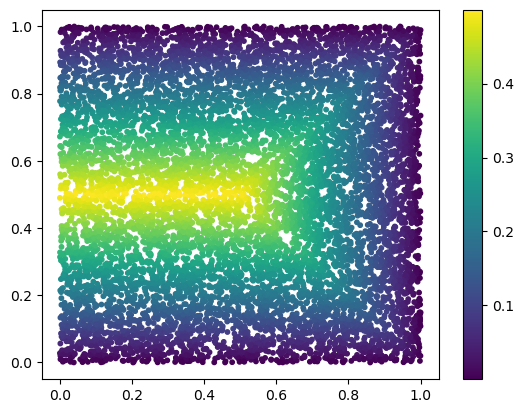

In [57]:
x = torch.rand(10000).reshape(-1, 1)
y = torch.rand(10000).reshape(-1, 1)


u, v, sxx, syy, sxy = temp_dist_torch(x, y)

sxy = sxy.numpy()


sc = plt.scatter(x, y, c=sxy, cmap='viridis', s=10)
plt.colorbar(sc)

In [17]:
x = np.random.uniform(0, 1, 10)
y = np.random.uniform(0, 1, 10)
print(x.shape)
b = 1-y
a = y
a1 = y/2
c = np.array([a, b, a1])
d = np.min([a, b, a1], axis=0)
print(c)
print(d)

(10,)
[[0.32319481 0.5904818  0.85389857 0.28706243 0.17306723 0.13402121
  0.99465383 0.17949787 0.31754682 0.5682914 ]
 [0.67680519 0.4095182  0.14610143 0.71293757 0.82693277 0.86597879
  0.00534617 0.82050213 0.68245318 0.4317086 ]
 [0.16159741 0.2952409  0.42694928 0.14353121 0.08653361 0.0670106
  0.49732691 0.08974893 0.15877341 0.2841457 ]]
[0.16159741 0.2952409  0.14610143 0.14353121 0.08653361 0.0670106
 0.00534617 0.08974893 0.15877341 0.2841457 ]


(100, 100)


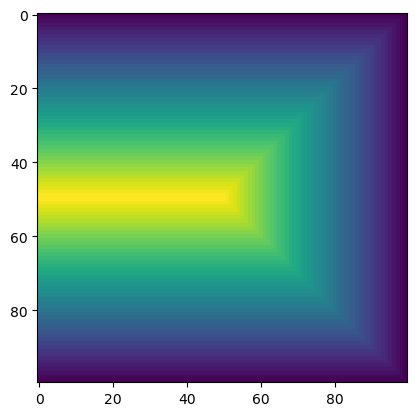

In [27]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)

xf = X.flatten().reshape(-1, 1)
yf = Y.flatten().reshape(-1, 1)

u, v, sxx, syy, sxy = temp_dist(X, Y)

print(u.shape)

plt.imshow(sxy)